In [1]:
import os
import csv
from matplotlib import pyplot as plt
import pandas as pd
from gym.envs.hyrule.hyrule_env import HyruleEnv

In [2]:
gyro_path = os.getcwd() + "/data/HET_0009.CSV"
data_path = os.getcwd() + "/data/saint-urbain/processed/data.hdf5"


In [3]:
gyro_df = pd.read_csv(gyro_path, sep=',', header=None)

In [4]:
cols = ["frm", "xAccel", "yAccel", "zAccel", "xGyro", "yGyro", "zGyro", "xMagnet", "yMagnet", "zMagnet"]

In [5]:
data = []
i = 0
for idx, row in gyro_df.iterrows():
    i += 1
    row_data = {}
    for idx2, element in row.iteritems():
        if "=" in str(element):
            k, v = element.split("=")
            if k in cols:
                row_data[k] = float(v)
    if len(row_data) > 1:
        data.append(row_data)
#     if i ==10:
#         break

In [6]:
gyro_df = pd.DataFrame(data, columns=cols)

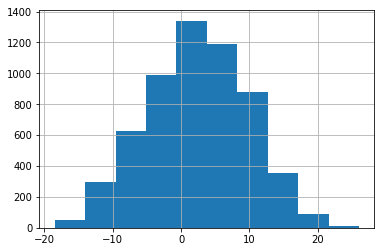

In [7]:
gyro_df[['xGyro', 'yGyro']].sum(axis=1).hist()

In [13]:
gyro_df[gyro_df[['xGyro', 'yGyro']].sum(axis=1) > 26] 

,frm,xAccel,yAccel,zAccel,xGyro,yGyro,zGyro,xMagnet,yMagnet,zMagnet
2965,2967.0,0.045654,-0.040771,-0.849121,15.090942,10.925293,-0.50354,-0.265327,0.166392,0.208364


In [14]:
data_df = pd.read_hdf(data_path)

In [15]:
data_df.loc[0]

angle                                                  352.569
thumbnail    [[[134, 139, 160], [144, 151, 156], [120, 124,...
x                                                    0.0135071
y                                                     -1.15745
z                                                            0
Name: 0, dtype: object

In [16]:
env = HyruleEnv()
obs = env.reset()

self.target_gps: (0.0882566738876458, 8.881468895106687)
self.agent_gps: (1.1787013408446207, -3.4902000313308235)


In [34]:
gyro_df[['xGyro', 'yGyro']].loc[22*90]

xGyro    0.366211
yGyro    0.732422
Name: 1980, dtype: float64

In [35]:
gyro_df[['xGyro', 'yGyro']].loc[23*90]

xGyro   -5.615234
yGyro    3.234863
Name: 2070, dtype: float64

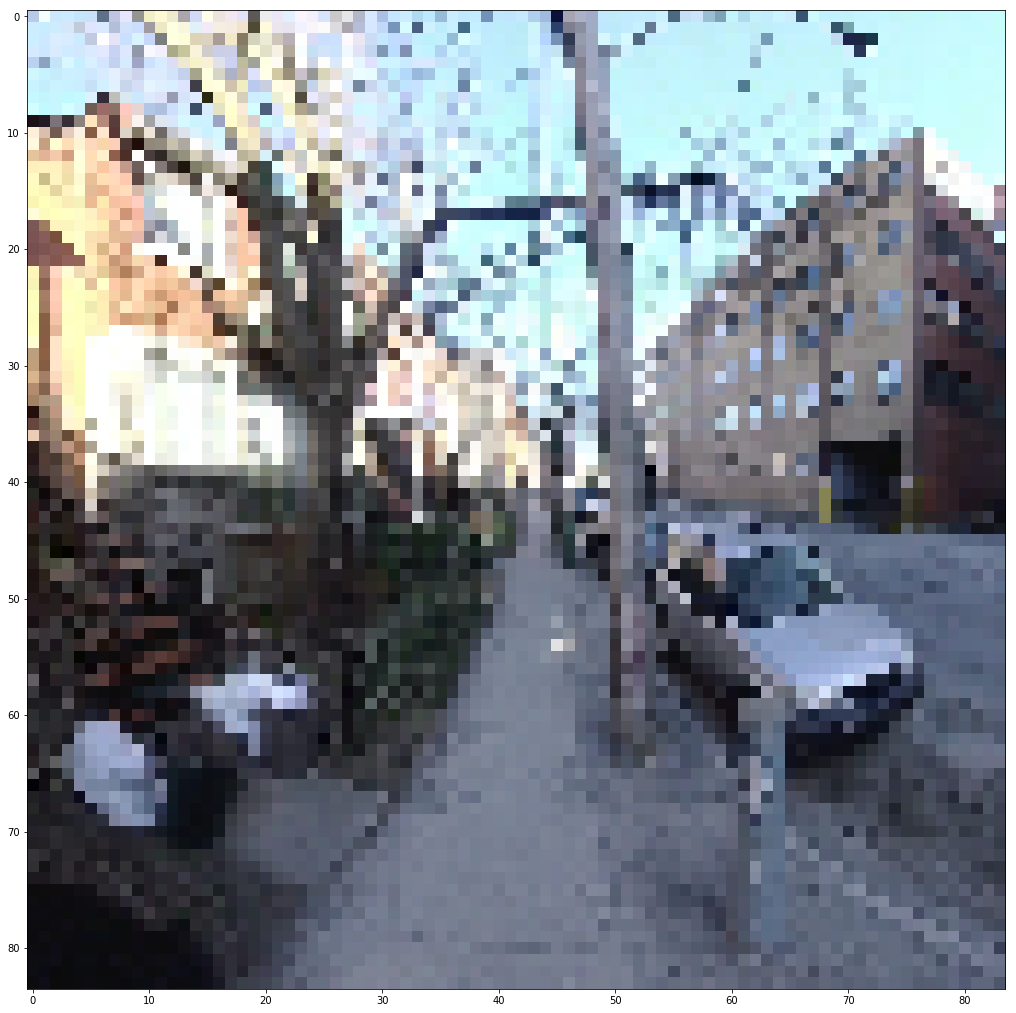

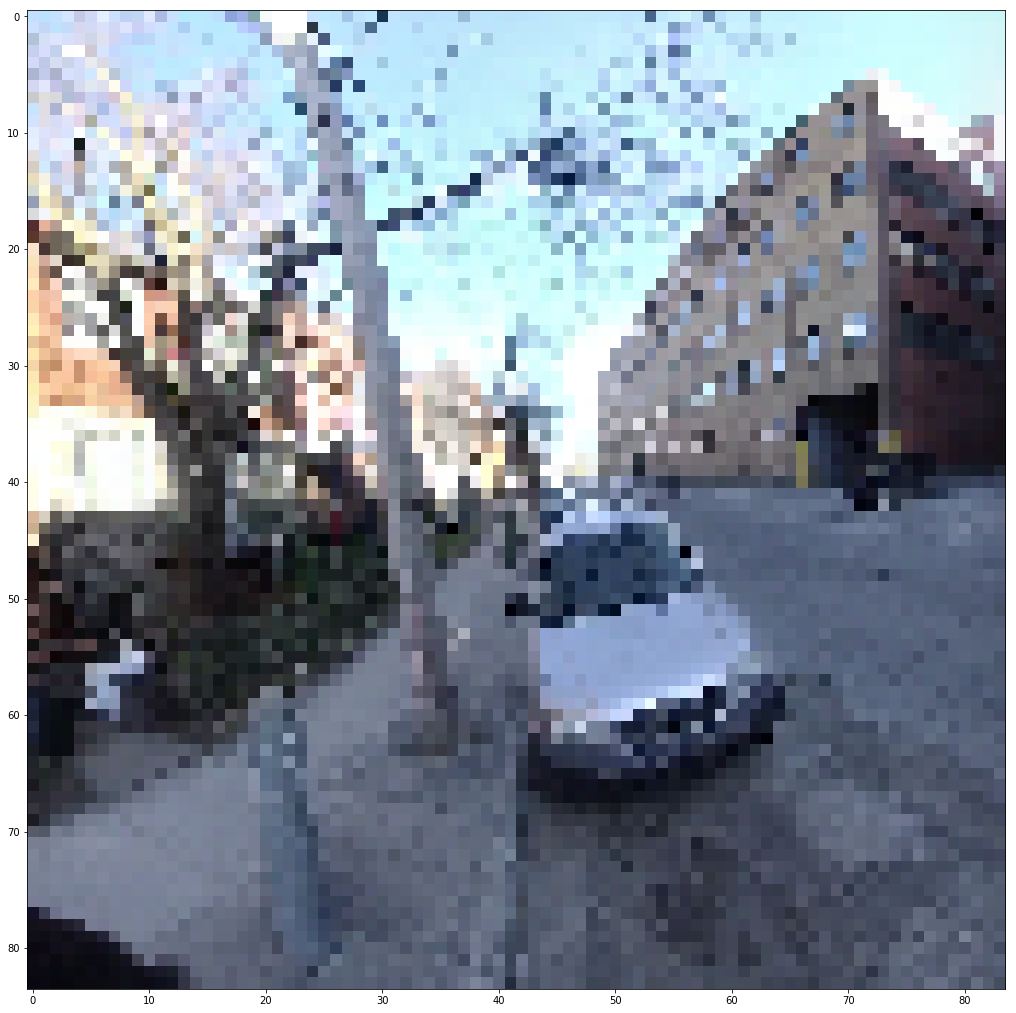

hooray


In [38]:
env.agent_dir = 120.
env.agent_pos = 23

env._get_image(high_res=False, plot=True)
env.agent_dir = 180.
env.transition()
env.agent_dir = 120.
env._get_image(high_res=False, plot=True)

print("hooray")